# Meep 计算光子晶体能带 (二) 三维纳米梁波导模式计算

日期：2023-04-22

## 说明

之前计算了简单二维光子晶体能带，了解了基本使用，现在用MEEP来计算一般的纳米梁结构的能带。我主要是重复[simpetuscloud](http://www.simpetuscloud.com/projects.html#mpb_bandgap) 的结果


![](http://www.simpetus.com/files/nanobeam_bands.png)

先进行基本的设置

In [1]:
import meep as mp
from meep import mpb


resolution = 20  # pixels/a

# 三维结构设置
# z周期
a = 0.43         # units of um
# 圆孔半径
r = 0.12         # units of um
# 高度
h = 0.22         # units of um
# 纳米梁宽度
w = 0.50         # units of um

# 归一化处理
r = r/a          # units of "a"
h = h/a          # units of "a"
w = w/a          # units of "a"

# 折射率设置
nSi = 3.5
Si = mp.Medium(index=nSi)

# 设置周期方向和大小，传播方向是周期的，设置为1，其他方向设置为4个周期大小，相应边界条件是不是为0？
geometry_lattice = mp.Lattice(size=mp.Vector3(1,4,4))

# 设置几何结构
geometry = [ mp.Block(center=mp.Vector3(), size=mp.Vector3(mp.inf,w,h), material=Si),
             mp.Cylinder(center=mp.Vector3(), radius=r, height=mp.inf, material=mp.air) ]
# 沿着传播方向改变波矢
num_k = 20
k_points = mp.interpolate(num_k, [mp.Vector3(0,0,0), mp.Vector3(0.5,0,0)])

# 五个本征值
num_bands = 5

# 初始化modesolver
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)
# 限制我们关注的模式是关于y奇对称，z偶对称
ms.run_yodd_zeven()

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.16279,0.511628)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.27907, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zevenyodd.
Initializing fields to random numbers...
22 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Ve

/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 4.060510879453044 (195.893% change)
    linmin: converged after 7 iterations.
    iteration    2: trace = 0.3976417885803876 (164.322% change)
    linmin: converged after 5 iterations.
    iteration    3: trace = 0.32428269762652 (20.3232% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 0.2929018769527173 (10.169% change)
    linmin: converged after 3 iterations.
    iteration    5: trace = 0.2851144471675198 (2.69454% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 0.281416490391901 (1.30547% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 0.2804393770374799 (0.347816% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 0.280070178793611 (0.131737% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 0.2799381370069353 (0.0471571% change)
    linmin: c

    iteration    7: trace = 0.3369816312851459 (0.000147999% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.3369814695190554 (4.80044e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.336981421844908 (1.41474e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 0.3369813966428317 (7.47877e-06% change)
Finished solving for bands 1 to 5 after 10 iterations.
zevenyoddfreqs:, 6, 0.119048, 0, 0, 0.119048, 0.112556, 0.206139, 0.258502, 0.303244, 0.350769
elapsed time for k point: 2.556060552597046
solve_kpoint (0.142857,0,0):
Solving for bands 1 to 5...
    linmin: converged after 4 iterations.
    iteration    1: trace = 0.3620786804944124 (0.112918% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.3619523309132684 (0.0349017% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.361923749287695 (0.00789683% change)
    linmin: converged 

Solving for bands 1 to 5...
    linmin: converged after 4 iterations.
    iteration    1: trace = 0.4847260053973749 (0.139809% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 0.484217141700525 (0.105035% change)
    linmin: converged after 4 iterations.
    iteration    3: trace = 0.4838982462468275 (0.0658796% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 0.4836859487661483 (0.043882% change)
    linmin: converged after 4 iterations.
    iteration    5: trace = 0.483628093696296 (0.011962% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.4836069440203554 (0.00437322% change)
    linmin: converged after 3 iterations.
    iteration    7: trace = 0.4835944104995327 (0.00259171% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 0.483590234116108 (0.000863617% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.4835880766507087 (0.000446136% 

    linmin: converged after 2 iterations.
    iteration    6: trace = 0.6684447624991989 (0.00188172% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.6684352514184414 (0.00142288% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.6684311658855091 (0.00061121% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.6684280733705803 (0.000462654% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 0.6684270396423415 (0.000154651% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 0.6684267187681302 (4.80044e-05% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 0.6684266051272788 (1.70012e-05% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 0.6684265771313728 (4.18833e-06% change)
Finished solving for bands 1 to 5 after 13 iterations.
zevenyoddfreqs:, 16, 0.357143, 0, 0, 0.357143, 0.234586, 0.3

    linmin: converged after 2 iterations.
    iteration   12: trace = 0.8135907124127462 (0.000100034% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 0.8135903013807833 (5.05207e-05% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 0.8135900803478251 (2.71676e-05% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 0.8135900617709697 (2.28332e-06% change)
Finished solving for bands 1 to 5 after 15 iterations.
zevenyoddfreqs:, 20, 0.452381, 0, 0, 0.452381, 0.250634, 0.332602, 0.435442, 0.463832, 0.48518
elapsed time for k point: 4.923030376434326
solve_kpoint (0.47619,0,0):
Solving for bands 1 to 5...
    linmin: converged after 4 iterations.
    iteration    1: trace = 0.8388988622808818 (0.131893% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 0.8379941531163149 (0.107903% change)
    linmin: converged after 4 iterations.
    iteration    3: trace = 0.8375449429348758 (

可以取出相应的本征值进行绘图

Text(0.5, 0, '$k_{x} a/(2\\pi)$')

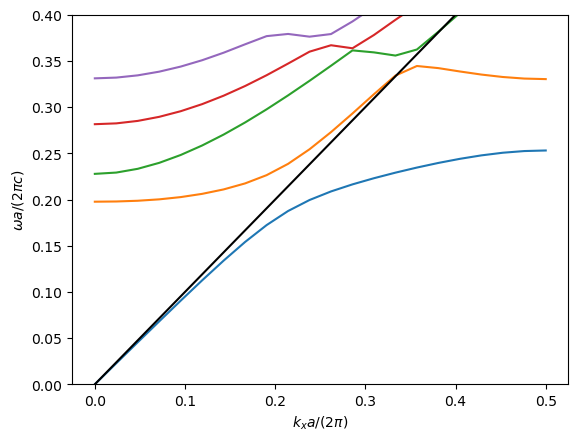

In [20]:
import matplotlib.pyplot as plt
import numpy as np

freqs = ms.all_freqs
gaps = ms.gap_list
kx=np.linspace(0,0.5,num_k+2)


fig=plt.figure()
for l in range(num_bands):
    plt.plot(kx,freqs[:,l])

plt.plot(kx,kx,'k')
plt.ylim([0,0.4])
plt.ylabel('$\omega a/(2\pi c)$')
plt.xlabel('$k_{x} a/(2\pi)$')

此时的Gap是不容易绘制出来的，需要通过图中的黑色光线来手动剔除。

另外一个需要关注的是场分布，通过以下代码绘制场的信息

In [22]:
# 计算特定结构下的场分布
efields = []
def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_yodd_zeven(mpb.output_at_kpoint(mp.Vector3(1/2, 0,0), mpb.fix_efield_phase,
          get_efields))

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.16279,0.511628)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.27907, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Solving for band polarization: zevenyodd.
Initializing fields to random numbers...
22 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.1190476190476

    iteration    2: trace = 0.3165305080861218 (0.0394622% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.3165089787766177 (0.00680189% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.3164949725126008 (0.00442533% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.3164886283825853 (0.00200452% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.3164867918972787 (0.000580271% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.3164863040024933 (0.00015416% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.3164861407279324 (5.15898e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.3164860885291206 (1.64932e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 0.3164860574972184 (9.80514e-06% change)
Finished solving for bands 1 to 5 after 10 iterat

    linmin: converged after 4 iterations.
    iteration    6: trace = 0.4544048557403303 (0.0481504% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 0.454253922244926 (0.0332212% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 0.4542009711050815 (0.0116574% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.4541728888529077 (0.00618297% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 0.4541634467778168 (0.00207898% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 0.4541609802536778 (0.000543093% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 0.4541600547085533 (0.000203793% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 0.454159788786586 (5.85525e-05% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 0.454159560918529 (5.01736e-05% change)
    linmin: 

    iteration    3: trace = 0.6268399516537586 (0.0140063% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 0.6267826854876681 (0.00913611% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.6267649167447913 (0.00283495% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.6267584907412084 (0.00102527% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.626754120862316 (0.000697221% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.6267523621021086 (0.000280614% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.6267512248625555 (0.00018145% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 0.6267508292411095 (6.31226e-05% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 0.6267507274608963 (1.62393e-05% change)
    linmin: converged after 2 iterations.
    iter

    linmin: converged after 2 iterations.
    iteration   13: trace = 0.7871394710784861 (0.000305931% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 0.7871383125645623 (0.00014718% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 0.7871380687753236 (3.09716e-05% change)
    linmin: converged after 2 iterations.
    iteration   16: trace = 0.7871380214500046 (6.01233e-06% change)
Finished solving for bands 1 to 5 after 16 iterations.
zevenyoddfreqs:, 19, 0.428571, 0, 0, 0.428571, 0.247767, 0.335244, 0.420557, 0.45154, 0.48229
elapsed time for k point: 4.346121549606323
solve_kpoint (0.452381,0,0):
Solving for bands 1 to 5...
    linmin: converged after 4 iterations.
    iteration    1: trace = 0.8160934620287659 (0.140259% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 0.8150012609756343 (0.133922% change)
    linmin: converged after 4 iterations.
    iteration    3: trace = 0.81429830168936 (0.0

可以看到导出的电场数据的几何结构

In [30]:
np.shape(efields)

(5, 20, 80, 80, 3)

分别是numbands,x,y,z,ExEyEz

In [ ]:
# Create an MPBData instance to transform the efields
eps = ms.get_epsilon() # 得到折射率分布
md = mpb.MPBData(rectify=True, resolution=32, periods=3)
converted_eps = md.convert(eps)


converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))


for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='jet', alpha=0.9)
    plt.axis('off')

plt.show()

In [85]:
# Create an MPBData instance to transform the efields
eps = ms.get_epsilon() # 得到折射率分布
md = mpb.MPBData(rectify=True, resolution=32, periods=1)
converted_eps = md.convert(eps)

converted = []
for f in efields:
    # Get just the x component of the efields
    f = (f[:,:,19, 2])
    converted.append(md.convert(f))

epsilon: 1-12.25, mean 1.33063, harm. mean 1.03196, 3.62734% > 1, 2.93889% "fill"
real part range: 1 .. 12.25
real part range: -0.00809084 .. 0.00809084
imag part range: -0.000220479 .. 0.000220479
real part range: -0.000312241 .. 0.000312241
imag part range: -0.0030927 .. 0.0030927
real part range: -0.000160822 .. 0.000160822
imag part range: -0.0557145 .. 0.0557145
real part range: -0.0697365 .. 0.0697365
imag part range: -0.000253728 .. 0.000253728
real part range: -0.000132564 .. 0.000132564
imag part range: -0.0145847 .. 0.0145847


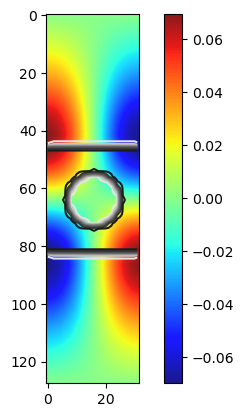

In [97]:
fig=plt.figure()
plt.contour(converted_eps[:,:,64].T, cmap='binary')
plt.imshow(np.real(converted[3]).T, interpolation='spline36', cmap='jet', alpha=0.9)
plt.colorbar()
plt.show()

In [90]:
print(np.shape(converted_eps))

(32, 128, 128)


可以看见，通过MPB计算能带是非常快的，也是很方便的，场的信息也可以非常快捷的输出。